# Funding Profile Analysis
- Is a financial assessment that examines how a project, company, or investment is financed over time.
- It looks at the sources of funds (like equity, debt, or grants), their timing, cost, risks, and suitability to the needs of the business or project.

# Term Explanation
Funding Profile Analysis shows where the money is coming from, how it's structured, and whether it's appropriate and sustainable for the long-term goals.

-  Average and total funding amount by funding_source, institution_id, or funding_currency

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import zscore
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv("Feature_Engineered_Funding_Data.csv")
df.head(5)

,institution_id,funding_source,funding_amount,maturity_date,refinancing_needed,interest_spread,funding_currency,days_to_maturity,credit_rating,z_score_spread,maturity_bucket,spread_level,funding_size_class,rating_score,is_foreign_currency,adjusted_spread,risk_bucket
0,INST0,equity,1.339455e+08,2025-01-01,0,30.54,JPY,148,A,-1.273219,short_term,low,small,3,1,0.206351,low_risk
1,INST1,interbank,2.864152e+08,2025-01-02,0,13.57,GBP,438,A,-0.744598,long_term,low,medium,3,1,0.030982,low_risk
2,INST2,equity,9.993584e+08,2025-01-03,0,-4.54,USD,637,B,1.727216,long_term,low,large,6,0,-0.007127,low_risk
3,INST3,bond,2.744035e+08,2025-01-04,1,57.77,EUR,667,B,-0.786244,long_term,medium,medium,6,1,0.086612,moderate_risk
4,INST4,equity,8.187816e+08,2025-01-05,0,34.79,GBP,85,D,1.101146,short_term,low,large,8,1,0.409294,low_risk


In [3]:
df['funding_amount'].describe()

count    1.000000e+05
mean     5.011790e+08
std      2.884306e+08
min      1.008162e+06
25%      2.522875e+08
50%      5.008132e+08
75%      7.508501e+08
max      9.999863e+08
Name: funding_amount, dtype: float64

- Group By funding resource

In [4]:
# Check the funding by resource
funding_resource = df.groupby("funding_source")['funding_amount'].agg(
    average_funding_amount = "mean",
    total_funding_amount = "mean",
    deal_count = "count"
).reset_index()

In [5]:
funding_resource

,funding_source,average_funding_amount,total_funding_amount,deal_count
0,bond,5.006398e+08,5.006398e+08,25092
1,equity,5.012857e+08,5.012857e+08,24654
2,interbank,5.018133e+08,5.018133e+08,25138
3,repo,5.009782e+08,5.009782e+08,25116


- Analyze the funding on each institution id

In [6]:
# Group by institution id
funding_for_each_institution = df.groupby("institution_id")['funding_amount'].agg(
    average_funding_amount = "mean",
    total_funding_amount = "mean",
    deal_count = "count"
).reset_index()

In [7]:
funding_for_each_institution

,institution_id,average_funding_amount,total_funding_amount,deal_count
0,INST0,4.615538e+08,4.615538e+08,10
1,INST1,3.385410e+08,3.385410e+08,10
2,INST10,4.051275e+08,4.051275e+08,10
3,INST100,5.801429e+08,5.801429e+08,10
4,INST1000,6.363469e+08,6.363469e+08,10
...,...,...,...,...
9995,INST9995,5.096555e+08,5.096555e+08,10
9996,INST9996,4.242859e+08,4.242859e+08,10
9997,INST9997,5.643321e+08,5.643321e+08,10
9998,INST9998,6.367812e+08,6.367812e+08,10


- Check the funding by each currency

In [8]:
funding_by_all_currencies = df.groupby("funding_currency")["funding_amount"].agg(
    average_funding_amount="mean",
    total_funding_amount="sum",
    deal_count="count"
).reset_index()

In [9]:
funding_by_all_currencies

,funding_currency,average_funding_amount,total_funding_amount,deal_count
0,EUR,5.009310e+08,1.253730e+13,25028
1,GBP,5.007358e+08,1.253241e+13,25028
2,JPY,5.026970e+08,1.253927e+13,24944
3,USD,5.003566e+08,1.250892e+13,25000


# Ready Plots from Chat GTP

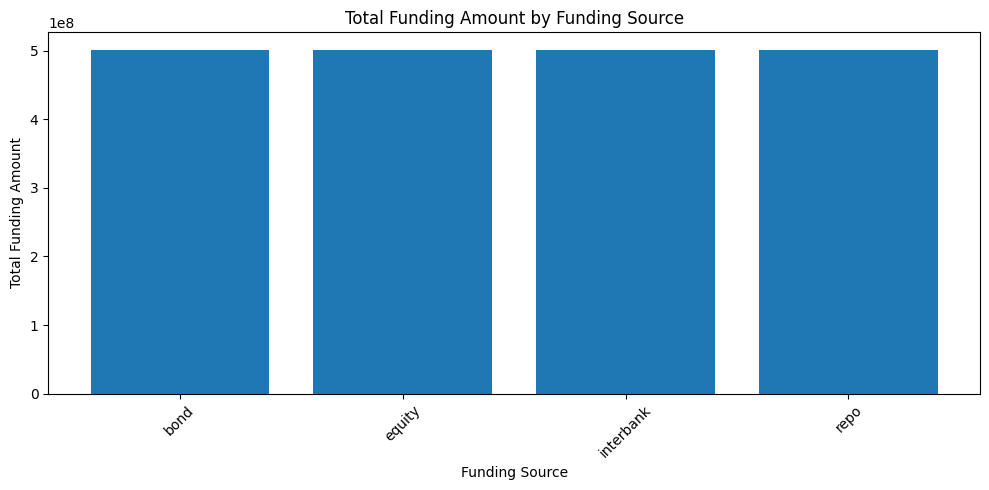

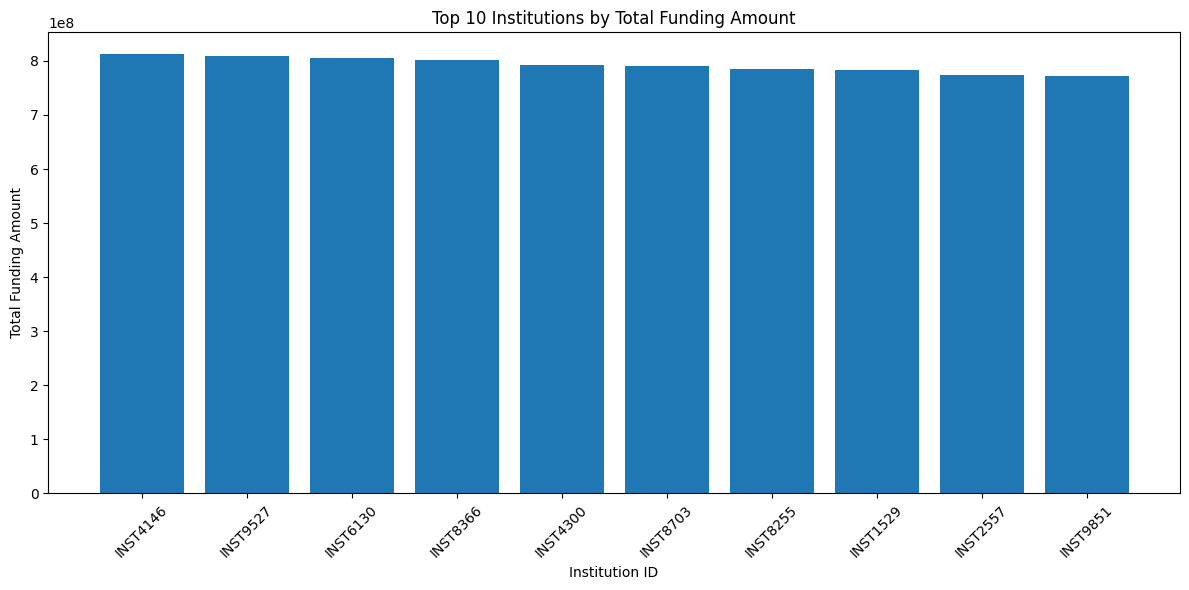

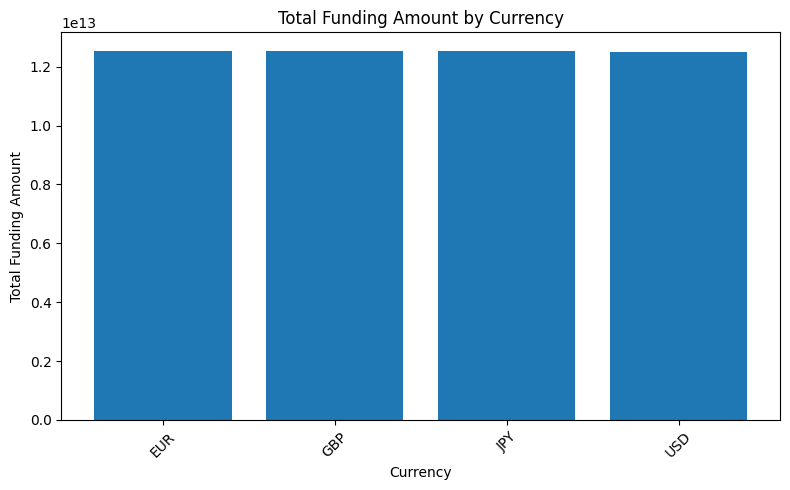

In [10]:
# Plot 1: Total Funding by Source
plt.figure(figsize=(10, 5))
plt.bar(funding_resource['funding_source'], funding_resource['total_funding_amount'])
plt.title('Total Funding Amount by Funding Source')
plt.xlabel('Funding Source')
plt.ylabel('Total Funding Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Top 10 Institutions by Total Funding
top_institutions = funding_for_each_institution.sort_values(by="total_funding_amount", ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_institutions['institution_id'], top_institutions['total_funding_amount'])
plt.title('Top 10 Institutions by Total Funding Amount')
plt.xlabel('Institution ID')
plt.ylabel('Total Funding Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 3: Total Funding by Currency
plt.figure(figsize=(8, 5))
plt.bar(funding_by_all_currencies['funding_currency'], funding_by_all_currencies['total_funding_amount'])
plt.title('Total Funding Amount by Currency')
plt.xlabel('Currency')
plt.ylabel('Total Funding Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create Funding Classes
- Check the distribution for each funding class

In [11]:
def funding_size_class(amount):
    if amount < 252_287_500:
        return 'Small'
    elif amount < 500_813_200:
        return 'Medium'
    elif amount < 750_850_100:
        return 'Upper-Medium'
    else:
        return 'Large'


In [12]:
# Create the funding class
df['funding_class'] = df['funding_amount'].apply(funding_size_class)

In [13]:
# Analysis based on the funding class
funding_class_analysis = df.groupby('funding_class').agg(
    number_of_deals=('funding_amount', 'count'),
    total_amount=('funding_amount', 'sum'),
    average_deal_size=('funding_amount', 'mean')
).reset_index()

In [14]:
funding_class_analysis

,funding_class,number_of_deals,total_amount,average_deal_size
0,Large,25000,2.189509e+13,8.758035e+08
1,Medium,25000,9.405988e+12,3.762395e+08
2,Small,25000,3.163540e+12,1.265416e+08
3,Upper-Medium,25000,1.565329e+13,6.261316e+08


In [15]:
total_funding = df['funding_amount'].sum()
funding_class_analysis['percent_of_total_funding'] = (funding_class_analysis['total_amount'] / total_funding * 100).round(2)


In [17]:
# Sort the values for readability
funding_class_analysis = funding_class_analysis.sort_values(by='total_amount', ascending=False)

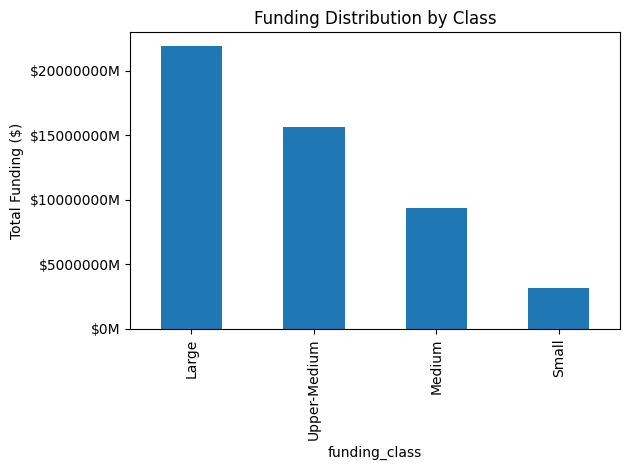

In [21]:
funding_class_analysis.plot(kind='bar', x='funding_class', y='total_amount', legend=False)
plt.ylabel('Total Funding ($)')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x/1e6:.0f}M'))
plt.title('Funding Distribution by Class')
plt.tight_layout()
plt.show()